In [1]:
import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import io
import gzip
import plotly.express as px


In [2]:
pasta = r'C:/Users/jgjoa/Desktop/FGV/Dissertação/VRA - Consolidado'  # Caminho para a pasta desejada

file_pattern = os.path.join(pasta, '*.csv')

df_unico = dd.read_csv(
    file_pattern,
    sep=';',
    dtype={'Código DI': 'object', 'Número de Assentos': 'float64', 'Número Voo' :'str' },
    low_memory=False
)

dfVRA = df_unico.compute()
dfVRA.head()

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,...,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada,Situacão Voo
0,AAL,"AMERICAN AIRLINES, INC.",0233,0,I,B772,246.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 15:05,...,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2012 23:25,01/01/2012 23:25,REALIZADO,NaN,2012-01-01,Pontual,Pontual,NaN
1,AAL,"AMERICAN AIRLINES, INC.",0234,0,I,B772,263.0,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2012 12:55,...,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 21:25,01/01/2012 21:25,REALIZADO,NaN,2012-01-01,Pontual,Pontual,NaN
2,AAL,"AMERICAN AIRLINES, INC.",0243,0,I,B752,174.0,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 02:05,...,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,01/01/2012 09:37,01/01/2012 09:37,REALIZADO,NaN,2012-01-01,Pontual,Pontual,NaN
3,AAL,"AMERICAN AIRLINES, INC.",0248,0,I,B752,174.0,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,01/01/2012 11:02,...,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 18:40,01/01/2012 18:40,REALIZADO,NaN,2012-01-01,Pontual,Pontual,NaN
4,AAL,"AMERICAN AIRLINES, INC.",0250,0,I,B763,219.0,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,01/01/2012 22:56,...,KDFW,DALLAS-FORT WORTH INTERNATIONAL AIRPORT - DALL...,02/01/2012 10:15,02/01/2012 10:15,REALIZADO,NaN,2012-01-01,Pontual,Pontual,NaN


In [3]:
dfVRA.shape


(11454592, 21)

In [4]:
dfVRA.columns


Index(['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo', 'Código DI',
       'Código Tipo Linha', 'Modelo Equipamento', 'Número de Assentos',
       'Sigla ICAO Aeroporto Origem', 'Descrição Aeroporto Origem',
       'Partida Prevista', 'Partida Real', 'Sigla ICAO Aeroporto Destino',
       'Descrição Aeroporto Destino', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Justificativa', 'Referência', 'Situação Partida',
       'Situação Chegada', 'Situacão Voo'],
      dtype='object')

In [5]:
dfVRA['Partida Prevista'] = pd.to_datetime(dfVRA['Partida Prevista'])
dfVRA['Data_partida'] = dfVRA['Partida Prevista'].dt.strftime('%Y-%m-01')


In [17]:
dfVRA2 = dfVRA[['Número Voo','Número de Assentos','Partida Prevista', 'Partida Real','Sigla ICAO Aeroporto Origem','Sigla ICAO Aeroporto Destino','Descrição Aeroporto Destino', 'Chegada Prevista', 'Chegada Real',
'Situação Voo','Data_partida']]

dfVRA2.head()

,Número Voo,Número de Assentos,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Origem,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Data_partida
0,0233,246.0,2012-01-01 15:05:00,01/01/2012 15:05,KMIA,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2012 23:25,01/01/2012 23:25,REALIZADO,2012-01-01
1,0234,263.0,2012-01-01 12:55:00,01/01/2012 12:55,SBGR,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 21:25,01/01/2012 21:25,REALIZADO,2012-01-01
2,0243,174.0,2012-01-01 02:05:00,01/01/2012 02:05,KMIA,SBBR,PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...,01/01/2012 09:37,01/01/2012 09:37,REALIZADO,2012-01-01
3,0248,174.0,2012-01-01 11:02:00,01/01/2012 11:02,SBBR,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2012 18:40,01/01/2012 18:40,REALIZADO,2012-01-01
4,0250,219.0,2012-01-01 22:56:00,01/01/2012 22:56,SBGL,KDFW,DALLAS-FORT WORTH INTERNATIONAL AIRPORT - DALL...,02/01/2012 10:15,02/01/2012 10:15,REALIZADO,2012-01-01


In [29]:
DfRJ = dfVRA2[(dfVRA2['Sigla ICAO Aeroporto Origem']=='SBGL') | (dfVRA2['Sigla ICAO Aeroporto Origem']=='SBRJ')]

DfRJ.head()

,Número Voo,Número de Assentos,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Origem,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Data_partida
4,0250,219.0,2012-01-01 22:56:00,01/01/2012 22:56,SBGL,KDFW,DALLAS-FORT WORTH INTERNATIONAL AIRPORT - DALL...,02/01/2012 10:15,02/01/2012 10:15,REALIZADO,2012-01-01
7,0904,219.0,2012-01-01 22:14:00,01/01/2012 22:14,SBGL,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2012 07:10,02/01/2012 07:10,REALIZADO,2012-01-01
25,0974,246.0,2012-01-01 23:25:00,01/01/2012 23:30,SBGL,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,02/01/2012 09:45,02/01/2012 09:36,REALIZADO,2012-01-01
31,0991,219.0,NaT,01/01/2012 12:34,SBGL,SBCF,TANCREDO NEVES - CONFINS - MG - BRASIL,NaN,01/01/2012 13:41,REALIZADO,NaN
46,0904,219.0,2012-02-01 22:14:00,02/01/2012 22:14,SBGL,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",03/01/2012 07:10,03/01/2012 07:10,REALIZADO,2012-02-01


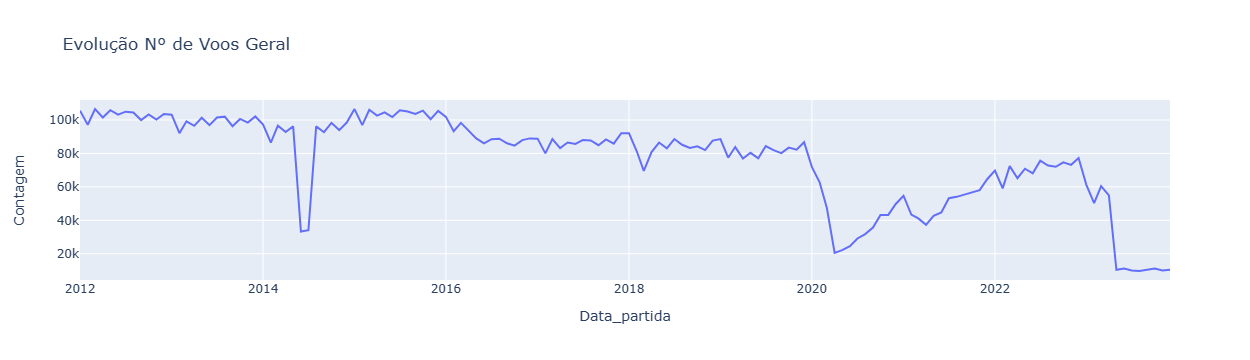

In [32]:
import plotly.express as px

# Contagem dos códigos por data
count_by_date = dfVRA2['Data_partida'].value_counts().sort_index().reset_index()
count_by_date.columns = ['Data_partida', 'Contagem']

# Criar o gráfico de linhas
fig = px.line(count_by_date, x='Data_partida', y='Contagem', title ='Evolução N° de Voos Geral')
# Exibir o gráfico
fig.show()

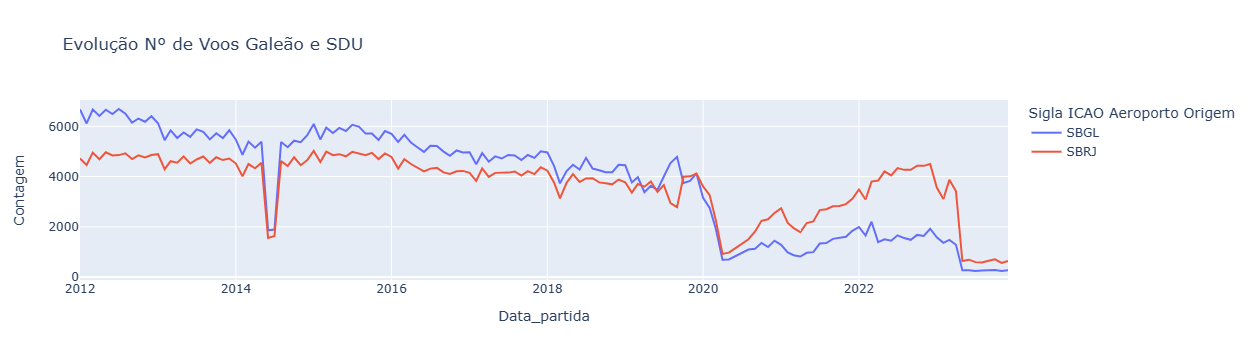

In [34]:
import plotly.express as px

# Filtrar o DataFrame para as duas categorias
df_filtered = dfVRA2[dfVRA2['Sigla ICAO Aeroporto Origem'].isin(['SBGL', 'SBRJ'])]

# Contagem dos códigos por data e categoria
count_by_date_category = df_filtered.groupby(['Data_partida', 'Sigla ICAO Aeroporto Origem']).size().reset_index()
count_by_date_category.columns = ['Data_partida', 'Sigla ICAO Aeroporto Origem', 'Contagem']

# Criar o gráfico de linhas com cores diferentes para cada categoria
fig = px.line(count_by_date_category, x='Data_partida', y='Contagem', color='Sigla ICAO Aeroporto Origem', title ='Evolução N° de Voos Galeão e SDU')

# Exibir o gráfico
fig.show()

In [27]:
import gzip

# Caminho para o arquivo de saída comprimido
output_file = 'C:/Users/jgjoa/Desktop/FGV/Dissertação/BaseTarifaCompleta.csv.gz'

# Salvar o DataFrame como CSV comprimido, especificando a codificação
with gzip.open(output_file, 'wt', encoding='utf-8') as f:
    dfVRA.to_csv(f, index=False)